# Titanic

Se adjunta un dataset sobre el desastre del Titanic para hacer ejercicios libres.

Algunos ejercicios que puedes llegar a realizar son:

* Ver el número de valores nulos
* Representar el porcentaje de filas con atributos nulos.
* Limpieza de columnas.
* Saber la edad mínima y máxima de las personas del barco.
* Conocer la mediana de las edades.
* Ver los precios (columna `fares`) más altos y bajos.
* Número de pasajeros embarcados (columna `Embarked`).
* Ver la distribución de sexos en las personas embarcadas.



In [384]:
import os
import re
import pandas as pd
import numpy as np
import requests
import csv
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [560]:
data = pd.read_csv('data/titanic.csv')

## 1. Descriptiva de las variables

Las 12 variables del dataset 'titanic' son las siguientes:

- $PassengerID$. Cuantitativa discreta. Identificador del pasajero.
- $Survived$. Binaria. Variable referente a la supervivencia al naufragio (no supervivencia = 0; supervivencia = 1).
- $Pclass$. Cualitativa ordinal. **integer**. Clase del pasajero (siendo 1 la clase más adinerada y 3 la clase más pobre).
- $Name$. Cualitativa nominal **string**. Nombre del pasajero.
- $Sex$. Cualitativa nominal **string**. Sexo del pasajero ('male' = hombre y 'female' = mujer).
- $Age$. Cuantitativa discreta **integer**. Edad del pasajero.
- $SibSp$. Cuantitativa discreta **integer**. Número de hermanos/as o hermanastros/as del pasajero.
- $Parch$. Cuantitativa discreta **integer**. Número de padres e hijos en el barco.
- $Ticket$. Cuantitativa discreta **integer**. Identificador del billete.
- $Fare$. Cuantitativa contínua **integer**. Precio del billete pagado por el pasajero.
- $Cabin$. Cuantitativa discreta **integer**. Identificador del camarote.
- $Embarked$. Cualitativa nominal **integer**. Puerto de embarque del pasajero (S = 'Southampton'; Q = 'Queenstown'; C = 'Cherbourg')

## 2. Limpieza de datos

### Análisis de columnas

In [561]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Tratamiento de valores faltantes

#### Valores nulos por columna

In [562]:
serie = data.isnull().mean() * 100
serie = serie.to_frame()
serie = serie.rename(columns={0:'Porcentaje'})
serie.to_csv('mi_dataframe.csv')

#### Imputaciones para la edad de los pasajeros.

- Variable *Edad*: Al tratarse de una variable cuantitativa discreta, se imputarán los valores a partir de la mediana de la misma.

In [592]:
age_para_grafica = data['Age'].fillna(-1)
mediana_edad = data['Age'].median()
data['Age'] = data['Age'].fillna(mediana_edad)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Imputaciones especiales de tickets LINE y de la columna *Embarked*.

In [564]:
data[data['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


Imputados los valores de la variable *Edad*, toca hacer lo propio con los dos valores faltantes de *Embarked*, los de las dos pasajeras con ID 62 y 839. Esta imputación se aplicará consultando las fuentes que nos aporten la información que requerimos. De acuerdo con *Encyclopedia Titanica*, tanto Amelie Icard como Martha Evelyn se subieron a bordo del Titanic en Southampton, por lo que añadiendo dos 'S' en esas posiciones tendremos el problema solucionado.

Además de imputar, tocará corregir ciertos datos de la columna *Fare* (el precio de los tickets) que hemos averiguado que son erróneos. Se tratará el tema en mayor profundidad en un apartado posterior, pero baste decir que el verdadero valor de todos los tickets de prefijo 'LINE' es 7.5. Colocaremos en la columna *Fare* los nuevos datos, que resultan ser cuatro.

In [501]:
billetes = data['Ticket']
patron_LINE = '.*LINE.*'
mascara_LINE = billetes.map(lambda x: bool(re.match(patron_LINE, x)))
indices_LINE = billetes[mascara_LINE].to_frame().index
tickets_LINE= data.loc[indices_LINE].reset_index(drop=True)
data.loc[179,'Fare'] = 7.5
data.loc[271,'Fare'] = 7.5
data.loc[302,'Fare'] = 7.5
data.loc[597,'Fare'] = 7.5

embarcados_desconocidos = data[data['Embarked'].isna()]
data.loc[61,'Embarked'] = 'S'
data.loc[829,'Embarked'] = 'S'

### Codificacion de las variables

Vamos a codificar nuestras variables categóricas para poder trabajar mejor con nuestro dataset. Para ello, creamos una copia y de ese modo, según nos interese, podemos utilizar el dataset original o la copia codificada.

- Dataset original: 'data'
- Dataset codificado: 'data_encoded'

In [502]:
data['Tipo_cabina'] = data['Cabin'].apply(lambda x: 'desconocida' if pd.isna(x) else 'conocida')

In [503]:
data['Prefijo_ticket'] = data['Ticket'].apply(lambda x: 'PC' if bool(re.match('.*PC.*', x)) else ('A/5' if bool(re.match('A\.?/([45])', x)) else 
('CA' if bool(re.match('(C.A.|CA).*', x)) else ('STON' if bool(re.match('.*TON.*', x)) else 'Sin Prefijo'))))

In [504]:
patron_PC = '.*PC.*'
patron_PP = '.*PP.*'
patron_CA = '(C.A.|CA).*'
patron_A5 = 'A/(4|5)'
patron_STON = '.*TON.*'

mascara_PC = billetes.map(lambda x: bool(re.match(patron_PC, x)))
mascara_PP = billetes.map(lambda x: bool(re.match(patron_PP, x)))
mascara_CA = billetes.map(lambda x: bool(re.match(patron_CA, x)))
mascara_A5 = billetes.map(lambda x: bool(re.match(patron_A5, x)))
mascara_STON = billetes.map(lambda x: bool(re.match(patron_STON, x)))

In [505]:
data_encoded = data.copy()
categorical_cols = data_encoded.select_dtypes(include='object').columns
encoders = {}

for col in categorical_cols:
    encoder = LabelEncoder()
    data_encoded[col] = encoder.fit_transform(data_encoded[col].astype(str))
    encoders[col] = encoder

data_encoded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tipo_cabina,Prefijo_ticket
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2,1,0
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0,0,2
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2,1,3
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2,0,4
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2,1,4


## 3. Análisis exploratorio de datos

In [573]:
df=data[data['Fare']>500]

df.to_csv('cardeza.csv', index=True)

In [583]:
edades = pd.DataFrame([data['Age'].min(),data['Age'].max()])
indices = ['Mínima', 'Máxima']
edades.index = indices
edades.columns = ['Edad']

edades.to_csv('edades.csv', index=True)

### Variables *Sexo*, *Edad* y *Clase*

In [595]:
pd.DataFrame(age_para_grafica)

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,-1.0
889,26.0


In [602]:

edad

,index
Age_Group,
0-10,62
10-20,102
20-30,397
30-40,167
40-50,89
50-60,48
60-70,19
70+,7


C:\Users\estev\AppData\Local\Temp\ipykernel_4496\2472171316.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\estev\AppData\Local\Temp\ipykernel_4496\2472171316.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\estev\AppData\Local\Temp\ipykernel_4496\2472171316.py:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\estev\AppData\Local\Temp\ipykernel_4496\2472171316.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` var

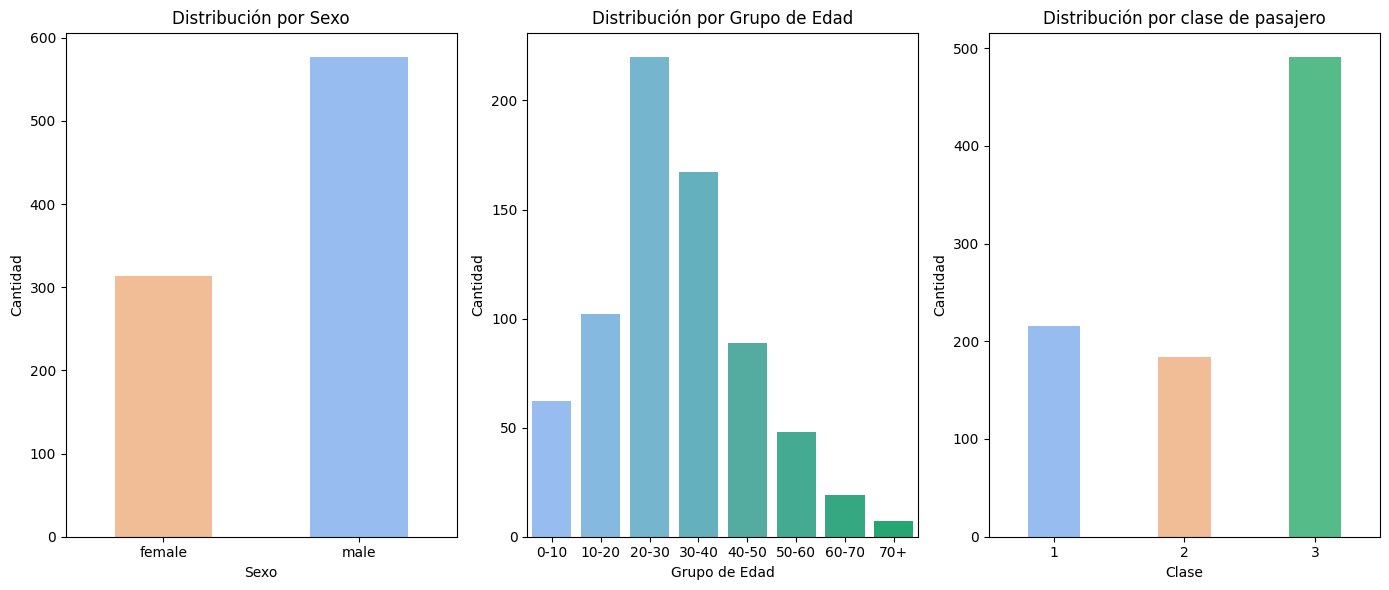

In [608]:
from PIL import Image
import io

sexo = pd.DataFrame(data['Sex']).reset_index()
sexo = sexo.groupby('Sex').agg({'index':'count'})
#sns.barplot(x='Sex',y='index',data= sexo)

# ATENCIÓN. CREACION DE UNA NUEVA VARIABLE: 'Grupo de edad'

bins = [0, 10, 20, 30, 40, 50, 60, 70, float('inf')]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
edad = pd.DataFrame(data['Age_Group']).reset_index()
edad = edad.groupby('Age_Group').agg({'index':'count'})
edad.loc['20-30', 'index'] -= (891-714)
#sns.barplot(x='Age_Group',y='index',data= edad)

clase = pd.DataFrame(data['Pclass']).reset_index()
clase = clase.groupby('Pclass').agg({'index':'count'})

fig, axs = plt.subplots(1, 3, figsize=(14, 6))
sns.barplot(x='Sex', y='index', data=sexo, ax=axs[0], width=0.5, palette={'male': '#88BBFF', 'female': '#FFBB88'})
axs[0].set_title('Distribución por Sexo')
axs[0].set_xlabel('Sexo')
axs[0].set_ylabel('Cantidad')

sns.barplot(x='Age_Group', y='index', data=edad, ax=axs[1],
            palette={'0-10': '#88BBFF', '10-20': '#77BBEE', '20-30': '#66BBDD','30-40': '#55BBCC', '40-50': '#44BBAA', '50-60': '#33BB99','60-70': '#22BB88', '70+': '#11BB77'})
axs[1].set_title('Distribución por Grupo de Edad')
axs[1].set_xlabel('Grupo de Edad')
axs[1].set_ylabel('Cantidad')

sns.barplot(x='Pclass', y='index', data=clase, ax=axs[2], width=0.4, palette={'1': '#88BBFF', '2': '#FFBB88', '3': '#44CC88'})
axs[2].set_title('Distribución por clase de pasajero')
axs[2].set_xlabel('Clase')
axs[2].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()


In [545]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tipo_cabina,Prefijo_ticket,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,desconocida,A/5,20-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,conocida,PC,30-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,desconocida,STON,20-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,conocida,Sin Prefijo,30-40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,desconocida,Sin Prefijo,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,desconocida,Sin Prefijo,20-30
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,conocida,Sin Prefijo,10-20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,desconocida,Sin Prefijo,20-30
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,conocida,Sin Prefijo,20-30


### Variable *Fare*

Echando una ojeada al dataset, podemos observar que los precios son muy dispares. Vamos a representar con gráfico de barras algunos de los percentiles para poder apreciar la gran diferencia. Si nos fijamos, la diferencia entre el ercer cuartil y el máximo es abismal. También realizamos un diagrama tipo *boxplot*, en el que podemos observar que la caja aparece aplasnada por la gran cantidad de outliers que hay por arriba. Tenemos muchos datos que son anormalmente grandes.

¿A qué se deben estos valores tan altos? Tirando de bibliografía podemos encontrar los precios reales que pagaron por su billete los pasajeros del Titanic, y encontramos que, por ejemplo, esos dos valores que tenemos por encima de las 500 libras (efectivamente son reales (fuente)/ están mál recogidos, por lo que ...(fuente))

In [546]:
precios = data['Fare']
fare_min = precios.quantile(0)
fare_lim_inf = precios.quantile(0.025)
fare_q25 = precios.quantile(0.25)
fare_mediana = precios.quantile(0.5)
fare_q75 = precios.quantile(0.75)
fare_lim_sup = precios.quantile(0.975)
fare_max = precios.quantile(1)

diccionario = {'mínimo':fare_min, 'percentil 2.5%':fare_lim_inf, 'primer cuartil':fare_q25, 'mediana':fare_mediana, 'tercer cuartil':fare_q75, 'percentil 97.5%':fare_lim_sup, 'máximo':fare_max}
df = pd.DataFrame(list(diccionario.items()), columns = ['Category','Value'])

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Gráfico de barras
fig_bar = px.bar(df, x='Category', y='Value', 
                 title="Percentiles del precio del ticket")

fig_bar.update_layout(
    title="Percentiles del precio del ticket",
    title_font_size=24,
    xaxis_title="Percentil",
    yaxis_title="Fare",
    font=dict(size=14),
    plot_bgcolor="rgba(0,0,0,0)",
    showlegend=False,
    title_x=0.5,
)

fig_bar.update_xaxes(tickangle=45)

# Boxplot
fig_box = px.box(precios, template="plotly_white")

fig_box.update_layout(
    title="Boxplot del precio que pagaron los pasajeros",
    title_font_size=24,
    xaxis_title="Data Scientist",
    yaxis_title="Precio del embarque",
    font=dict(size=14),
    plot_bgcolor="rgba(0,0,0,0)",
    showlegend=False, 
    title_x=0.5
)

fig_box.update_traces(boxpoints='all',
    marker_color='blue',
    boxmean=True,
    jitter=0.3,
    pointpos=-1.5,
    line=dict(color="black")
)

# Crear subplots con 1 fila y 2 columnas
fig = make_subplots(rows=1, cols=2, subplot_titles=("Percentiles del precio del ticket", "Boxplot de la dispersión del precio"))

# Añadir la primera gráfica (gráfico de barras) en la columna 1
for trace in fig_bar['data']:
    fig.add_trace(trace, row=1, col=1)

# Añadir la segunda gráfica (boxplot) en la columna 2
for trace in fig_box['data']:
    fig.add_trace(trace, row=1, col=2)

# Ajustar el layout
fig.update_layout(
    height=600, width=1350,  # Tamaño total de la figura
    title_text="Comparación de gráficos",
    title_x=0.5,  # Título general
    showlegend=False
)

# Mostrar las gráficas
fig.show()




Corrigiendo los outlier de la columna *Fare*, tenemos esta dispersión, mucho mejor para poder hacer modelos predictivos.

In [547]:
precios = np.log(precios)
fare_min = precios.quantile(0)
fare_lim_inf = precios.quantile(0.025)
fare_q25 = precios.quantile(0.25)
fare_mediana = precios.quantile(0.5)
fare_q75 = precios.quantile(0.75)
fare_lim_sup = precios.quantile(0.975)
fare_max = precios.quantile(1)


diccionario = {'mínimo':fare_min, 'percentil 2.5%':fare_lim_inf, 'primer cuartil':fare_q25, 'mediana':fare_mediana, 'tercer cuartil':fare_q75, 'percentil 97.5%':fare_lim_sup, 'máximo':fare_max}
df = pd.DataFrame(list(diccionario.items()), columns = ['Category','Value'])

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Gráfico de barras
fig_bar = px.bar(df, x='Category', y='Value', 
                 title="Percentiles del precio del ticket")

fig_bar.update_layout(
    title="Percentiles del precio del ticket",
    title_font_size=24,
    xaxis_title="Percentil",
    yaxis_title="Fare",
    font=dict(size=14),
    plot_bgcolor="rgba(0,0,0,0)",
    showlegend=False,
    title_x=0.5, template ='gridon'
)

fig_bar.update_xaxes(tickangle=45)

# Boxplot
fig_box = px.box(precios)

fig_box.update_layout(
    title="Boxplot del precio que pagaron los pasajeros",
    title_font_size=24,
    xaxis_title="Data Scientist",
    yaxis_title="Precio del embarque",
    font=dict(size=14),
    plot_bgcolor="rgba(0,0,0,0)",
    showlegend=False, 
    title_x=0.5
)

fig_box.update_traces(boxpoints='all',
    marker_color='blue',
    boxmean=True,
    jitter=0.3,
    pointpos=-1.5,
    line=dict(color="black")
)

# Crear subplots con 1 fila y 2 columnas
fig = make_subplots(rows=1, cols=2, subplot_titles=("Percentiles del precio del ticket", "Boxplot de la dispersión del precio"))

# Añadir la primera gráfica (gráfico de barras) en la columna 1
for trace in fig_bar['data']:
    fig.add_trace(trace, row=1, col=1)

# Añadir la segunda gráfica (boxplot) en la columna 2
for trace in fig_box['data']:
    fig.add_trace(trace, row=1, col=2)

# Ajustar el layout
fig.update_layout(
    height=600, width=1350,  # Tamaño total de la figura
    title_text="Comparación de gráficos una vez removidos los outliers",
    title_x=0.5,  # Título general
    showlegend=False
)

# Mostrar las gráficas
fig.show()


c:\Users\estev\OneDrive\Documentos\GitHub\mi_nuevo_entorno\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

divide by zero encountered in log

c:\Users\estev\OneDrive\Documentos\GitHub\mi_nuevo_entorno\lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning:

invalid value encountered in subtract



### Variable *Embarked*

In [548]:
embarque = pd.DataFrame(data['Embarked']).reset_index()
embarque = embarque.groupby('Embarked').agg({'index':'count'}).reset_index()
embarque.columns = ['Embarked', 'Count']  

embarque['Embarked'] = embarque['Embarked'].replace({
    'C': 'Cherburgo (FR)',
    'Q': 'Queenstown (IR)',
    'S': 'Southampton (EN)'
})

fig = px.pie(
    embarque,
    values='Count',
    names='Embarked',
    title='Porcentaje de personas embarcadas en cada puerto',
    template='seaborn'  
)
fig.update_layout(width=800, height=450)
fig.update_traces(textfont_size=14)
fig.show()

#### Variables siblings y parch

In [586]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [590]:
df =data.groupby('SibSp').agg({'PassengerId':'count'}) 
df.to_csv('hermanos.csv', index=True)

In [591]:
df=data.groupby('Parch').agg({'PassengerId':'count'})
df.to_csv('Padres_hijos.csv', index=True)

## 4. Matriz de correlaciones

In [514]:
corr_matrix = data_encoded.corr(method='spearman')
fig = px.imshow(
    corr_matrix,
    text_auto='.4f',  # Limita a 4 decimales
    aspect='auto',
    title='Coeficientes de correlación entre las variables',
    width=1300,        # Ajusta el ancho de la figura
    height=500        # Ajusta la altura de la figura
)

# Muestra la figura
fig.show()

In [325]:
df = data.groupby('Embarked').agg({'Fare':'mean'})
df

,Fare
Embarked,
C,59.954144
Q,13.276030
S,27.290091


In [326]:
df = data.groupby(['Pclass','Sex']).agg({'Sex':'count','Survived':'mean','Fare':'mean'})
df

Sex  Survived        Fare
Pclass Sex                              
1      female   94  0.968085  106.125798
       male    122  0.368852   67.226127
2      female   76  0.921053   21.970121
       male    108  0.157407   19.741782
3      female  144  0.500000   16.118810
       male    347  0.135447   12.748088

## 5. El enigma de los tickets. ¿Es importante para nuestro análisis?

### ¿Por qué algunos tickets valían cero?

- Tickets LINE: 

De acuerdo con *Encyclopedia Titanica*, cinco empleados de la compañía naviera *American Line* habían sido acogidos como pasajeros de tercera clase en el Titanic al módico precio de 7.5 libras de la época. El caso más conocido fue el del único superviviente, William Henry Tornquist, pero hubieron otros cinco más: Andrew John Shannon (Mr. Lionel Leonard en la lista), Alfred Johnson, William Cahoone Johnson y otros dos que no aparecen en esta lista. 

La acogida se debió a la cancelación del Philadelphia, que les habría retornado a los Estados Unidos de no ser por las huelgas de los mineros ingleses que privaban de carbón a trenes y trasatlánticos y, por otra parte, al hecho de que el poco carbón disponible iba a ser utilizado para la gran inauguración del Titanic.

De acuerdo con lo anterior, el precio real de estos tickets fue de 7.5 libras.

In [552]:
data[data['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tipo_cabina,Prefijo_ticket,Age_Group
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,conocida,Sin Prefijo,40-50
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,28.0,0,0,239853,0.0,NaN,S,desconocida,Sin Prefijo,20-30
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,28.0,0,0,239853,0.0,NaN,S,desconocida,Sin Prefijo,20-30
466,467,0,2,"Campbell, Mr. William",male,28.0,0,0,239853,0.0,NaN,S,desconocida,Sin Prefijo,20-30
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,239854,0.0,NaN,S,desconocida,Sin Prefijo,20-30
633,634,0,1,"Parr, Mr. William Henry Marsh",male,28.0,0,0,112052,0.0,NaN,S,desconocida,Sin Prefijo,20-30
674,675,0,2,"Watson, Mr. Ennis Hastings",male,28.0,0,0,239856,0.0,NaN,S,desconocida,Sin Prefijo,20-30
732,733,0,2,"Knight, Mr. Robert J",male,28.0,0,0,239855,0.0,NaN,S,desconocida,Sin Prefijo,20-30
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,conocida,Sin Prefijo,30-40
815,816,0,1,"Fry, Mr. Richard",male,28.0,0,0,112058,0.0,B102,S,conocida,Sin Prefijo,20-30


- **Ticket de Thomas Andrews**, el ingeniero responsable de la construcción del Titanic (ticket 112050). Pasaje gratis por ser el encargado de la contrucción.

- Tickets que empiezan por '239...':

El conjunto de tickets que empiezan por '239...' y que figuran con un 'Fare' igual a cero pertenecen todos a un grupo de empleados llamado 'Guarantee Group', que había trabajado en la contrucción del barco y que habían sido invitados por el diseñador del mismo, Thomas Andrews, para este viaje inaugural como honra a su destacado trabajo. Se les permitió un pasaje gratuíto (Titanic Talks, 2020), por lo que sí es en este caso correcta la asignación de 0 libras en la variable 'Fare'. 

- Tickets que empiezan por '112...':

Tanto los señores William Harrison como Richard Fry eran, respectivamente, el secretario y el asistente personal del mismísimo Joseph Bruce Ismay (ausente en esta lista), el director de la compañía constructora del Titanic White Star Line. Por lo tanto, sus tickets sí que eran gratuítos, y lo mismo ocurre con el ticket 112050 del ingeniero Thomas Andrews. En el caso de William Parr, se trataba de un ingeniero eléctrico que también formaba parte del 'Guarantee Group' pero, a diferencia de sus compañeros, viajó en primera clase (Encyclopedia Titanica).


- Ticket número 19972:

El caso de John George Reulchin es algo más curioso. Se trataba de un empleado de la compañía Holland America Line, que estaba en el mismo grupo que la White Star Line, por lo que su pasaje le salió gratuito. Se subió al bordo del Titanic en el viaje inaugural por trabajo, ya que le habían enconmendado evaluar a los trasatlánticos de clase olímpica (Encyclopedia Titanica).  

### Tickets con letras: creación de 4 clases de tickets en base a su prefijo

Estos son los pasajeros que habían comprado un billete con letras.

In [12]:
billetes = data['Ticket']

patron = '[A-Za-z]'
mascara = billetes.map(lambda x: bool(re.match(patron, x)))
indices = billetes[mascara].to_frame().index
tickets_con_letras = data.loc[indices].reset_index(drop=True)

tickets_con_letras

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
225,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
226,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
227,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
228,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


Y estos son los que adquirieron uno sin letras...

¿Podemos ver alguna diferencia entre los dos grupos?

- Quizá el lugar donde embarcaron...
- Tal vez el precio que abonaron...
- A lo mejor en un grupo hay una tasa de supervivencia mucho mayor que en el otro...

#### ¿Qué significaban las letras?

<div style="font-family: 'arial narrow'; font-size: 18px; text-indent: 40px;">
  Hay muy poca información al respecto del significado de las letras que podemos observar en la numeración de los tickets. Lo más que se puede encontrar 
  en la red a día de hoy son comentarios en algunos foros relacionados con esta temática. 
  <br>
  
  Para ahondar un poco más en este asunto, veremos qué se comenta en estos foros al respecto de los prefijos de los tickets y si tienen sentido algunas de sus hipótesis, teniendo en cuenta que, si agrupamos los datos por tipo de billetes, el resto de variables nos pueden otorgar bastante información que de otra forma pasaría inadvertida.
</div>

In [429]:
billetes = data['Ticket']

patron_PC = '.*PC.*'
patron_PP = '.*PP.*'
patron_CA = '(C.A.|CA).*'
patron_A5 = 'A\.?/([45])'
patron_STON = '.*TON.*'

mascara_PC = billetes.map(lambda x: bool(re.match(patron_PC, x)))
mascara_PP = billetes.map(lambda x: bool(re.match(patron_PP, x)))
mascara_CA = billetes.map(lambda x: bool(re.match(patron_CA, x)))
mascara_A5 = billetes.map(lambda x: bool(re.match(patron_A5, x)))
mascara_STON = billetes.map(lambda x: bool(re.match(patron_STON, x)))

indices_PC = billetes[mascara_PC].to_frame().index
indices_PP = billetes[mascara_PP].to_frame().index
indices_CA = billetes[mascara_CA].to_frame().index
indices_A5 = billetes[mascara_A5].to_frame().index
indices_STON = billetes[mascara_STON].to_frame().index

tickets_PC = data.loc[indices_PC].reset_index(drop=True)
tickets_PP = data.loc[indices_PP].reset_index(drop=True)
tickets_CA = data.loc[indices_CA].reset_index(drop=True)
tickets_A5 = data.loc[indices_A5].reset_index(drop=True)
tickets_STON= data.loc[indices_STON].reset_index(drop=True)

##### Billetes 'PC'


La hipótesis más aceptada es que el prefijo 'PC' significaba 'Private Class' o 'Private Cabine'. Teniendo en cuenta que todos los pasajeros poseedores de este tipo de ticket era de primera clase, estas hipótesis tienen bastantes visos de ser ciertas.

In [519]:
df = tickets_PC.groupby('Sex').agg({
    'Sex': 'count',
    'Age':'mean',
    'Pclass': 'mean',
    'Survived':'mean',
    'Fare':'mean'})

df.to_csv('PC.csv', index=True)


In [234]:
import plotly.subplots as sp
PC = tickets_PC.groupby('Embarked').agg({
    'PassengerId': 'count'}).reset_index()

Total = data.groupby('Embarked').agg({
    'PassengerId': 'count'}).reset_index()

PC['Embarked'] = PC['Embarked'].replace({
    'C': 'Cherburgo (FR)',
    'Q': 'Queenstown (IR)',
    'S': 'Southampton (EN)'
})

Total['Embarked'] = Total['Embarked'].replace({
    'C': 'Cherburgo (FR)',
    'Q': 'Queenstown (IR)',
    'S': 'Southampton (EN)'
})

# Crear una figura de subplots con 1 fila y 2 columnas
fig = sp.make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                       subplot_titles=('Pasajeros con tickets PC', 'Pasajeros'))

# Donut para df1
fig.add_trace(
    px.pie(PC, names='Embarked', values='PassengerId', hole=0.4).data[0],
    row=1, col=1
)
fig.update_traces(marker=dict(line=dict(color='grey', width=2)))
# Donut para df2
fig.add_trace(
    px.pie(Total, names='Embarked', values='PassengerId', hole=0.4).data[0],
    row=1, col=2
)

# Actualizar layout
fig.update_layout(
    title_text="Diferencia en el embarque entre los pasajeros con tickets 'PC' y el resto",
    title_x=0.5, template = 'seaborn',paper_bgcolor='#DDDDEE'
)
fig.update_traces(marker=dict(line=dict(color='grey', width=2)))
# Donut para df2
fig.update_layout(width=1100, height=450, title={

        'font': {'size': 22}  # Tamaño del título
    })
# Mostrar la gráfica
fig.update_annotations(yshift=10)
fig.show()


##### Billetes 'A/5 o A/4'


Todos los tickets de este tipo son de tercera clase, pero llama la atención que, de los 23 que hemos encontrado, 21 de ellos pertenezcan a hombres y sólo dos de ellos a mujeres. Teniendo en cuenta que entre los pasajeros de tercera clase hay unos 2.5 hombres por cada mujer, en este grupo de billetes hay una clara infrarrepresentación de mujeres.

In [518]:
df1 =tickets_A5.groupby('Sex').agg({
    'Sex': 'count',
    'Age':'mean',
    'Pclass': 'mean',
    'Survived':'mean',
    'Fare':'mean'})

df2 = data.groupby(['Sex','Pclass']).agg({'Pclass':'count'})
df1.to_csv('A5.csv', index=True)

Text(0, 0.5, 'Categorías')

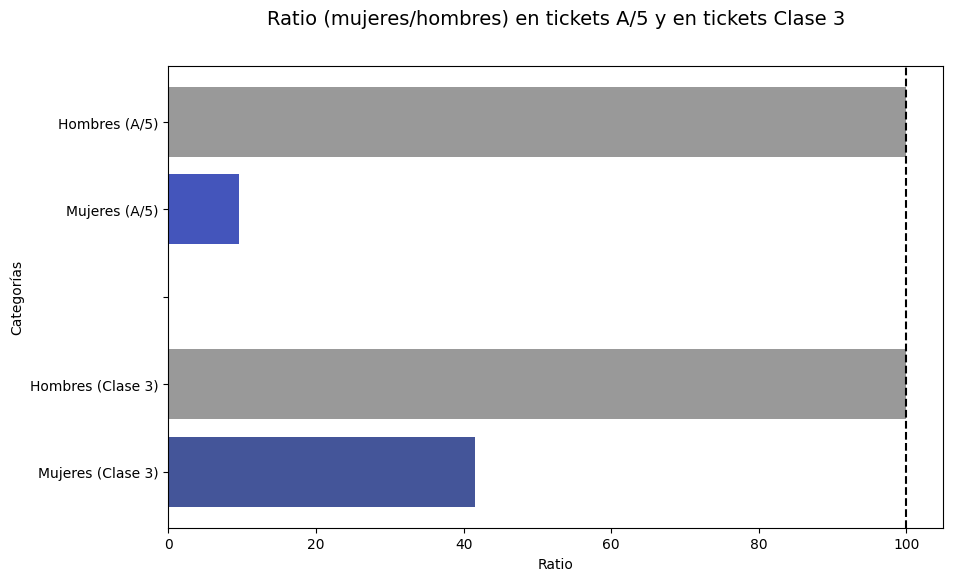

In [433]:
comparison_data = pd.DataFrame({
    'Category': ['Mujeres (Clase 3)', 'Hombres (Clase 3)','','Mujeres (A/5)', 'Hombres (A/5)'],
    'Values': [144/347*100, 100, 0, 2/21*100, 100]
})


plt.figure(figsize=(10, 6))
plt.barh(comparison_data['Category'], comparison_data['Values'], color=['#445599', '#999999', '#4455BB','#4455BB', '#999999'])

plt.axvline(x=100, color='black', linestyle='--', linewidth=1.5)

plt.title('Ratio (mujeres/hombres) en tickets A/5 y en tickets Clase 3', fontsize=14, pad=30)
plt.xlabel('Ratio')
plt.ylabel('Categorías')




##### Billetes 'C.A. o CA'


Esta clase de billetes se vendieron a pasajeros de segunda y de tercera clase, prácticamente en la misma proporción (en mujeres más de segunda clase y en hombres más de tercera). Todos ellos embarcaron en Southampton. Llama la atención la existencia de un ticket que incluye los prefijos C.A. y SOTON.

In [520]:
df = tickets_CA.groupby('Sex').agg({
    'Sex': 'count',
    'Age':'mean',
    'Pclass': 'mean',
    'Survived':'mean',
    'Fare':'mean'})
df.to_csv('CA.csv', index=True)


##### Billetes 'STON o SOTON'

Se vendieron un total de 36 tickets de este tipo, todos ellos de tercera clase. Únicamente hubo 6 mujeres que lo adquirieron, por lo que también aquí hay una infrarrepresentación del sexo femenino.

In [515]:
df=tickets_STON.groupby('Sex').agg({
    'Sex': 'count',
    'Age':'mean',
    'Pclass': 'mean',
    'Survived':'mean',
    'Fare':'mean'})

df.to_csv('STON.csv', index=True)

### Influyen realmente estos tickets sobre otras variables?

Sí, pero no sobre la supervivencia, que es la que nos interesa...

In [521]:
data.groupby('Embarked').agg({'Fare':'mean'})

,Fare
Embarked,
C,59.954144
Q,13.276030
S,27.290091


In [522]:
df = data.groupby(['Pclass','Sex']).agg({'Sex':'count','Survived':'mean','Fare':'mean'})
df

Sex  Survived        Fare
Pclass Sex                              
1      female   94  0.968085  106.125798
       male    122  0.368852   67.226127
2      female   76  0.921053   21.970121
       male    108  0.157407   19.741782
3      female  144  0.500000   16.118810
       male    347  0.135447   12.748088

## 6. Análisis de supervivencia 

### Supervivencia por sexo

In [543]:
df = data.groupby(['Sex']).agg({'Survived':'mean'})
df = df.reset_index('Sex')
df

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Supervivencia por grupos de tickets

In [537]:
data1 = {'Mujeres': [0.965517,0,0.705882,0.5], 'Hombres': [0.354839, 0.095238, 0.142857, 0.233333]}
df = pd.DataFrame(data1)
df.index = ['PC', 'A/5 ó A/4', 'C.A.', 'STON ó SOTON']



fig = px.line(df, x=df.index, y=["Mujeres",'Hombres'],template = 'plotly_dark',title = 'Tasa de supervivencia en hombres y mujeres para los cuarto grupos de tickets',
              markers = True)
fig.update_layout(width=900,  
    height=450 , legend_title ='Sexo', xaxis_title = 'Categoria de ticket', yaxis_title = 'Tasa de supervivencia')
fig.show()


### Supervivencia por clases

In [538]:
df = data.groupby(['Pclass','Sex']).agg({'Survived':'mean'})
df = df.reset_index('Sex')

df['Sex'] = df['Sex'].replace({'male': 'Hombres', 'female': 'Mujeres'})
fig = px.line(df, x=df.index, y='Survived', color = 'Sex', template = 'plotly_dark',title = 'Tasa de supervivencia en hombres y mujeres por clase',
              markers = True)
fig.update_layout(width=900,  
    height=450 , legend_title ='Sexo', xaxis_title = 'Clase', yaxis_title = 'Tasa de supervivencia')
fig.show()


In [539]:
df = data.groupby(['Age_Group','Sex']).agg({'Survived':'mean'})
df = df.reset_index('Sex')
df['Sex'] = df['Sex'].replace({'male': 'Hombres', 'female': 'Mujeres'})
fig = px.line(df, x=df.index, y='Survived', color = 'Sex', template = 'plotly_dark',title = 'Tasa de supervivencia en hombres y mujeres por grupo de edad',
              markers = True)
fig.update_layout(width=900,  
    height=450 , legend_title ='Sexo', xaxis_title = 'Grupo de Edad', yaxis_title = 'Tasa de supervivencia')
fig.show()

C:\Users\estev\AppData\Local\Temp\ipykernel_4496\769387295.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Otros gráficos de interés

In [18]:
tickets_sin_letras = data.drop(indices).reset_index(drop=True)
clasificación_tickets_1 = {'con letras':len(tickets_con_letras),'sólo dígitos':len(billetes) - len(tickets_con_letras)}

df = pd.DataFrame(list(data.items()), columns=['Category', 'Value'])
colors = ['#636EFA', '#EF553B']
fig = px.pie(df, names = clasificación_tickets_1.keys(), values=clasificación_tickets_1.values(), title = 'Ratio de tickets con letras sobre el total', template = 'plotly_dark', color_discrete_sequence=colors)
fig.update_layout(width=900,  
    height=450  )
fig.update_traces(textinfo='percent+label',  # Mostrar porcentaje y etiquetas
                  marker=dict(line=dict(color='#000000', width=2)))
fig.write_image("img/boxplot_ratio_letras.png")
fig.show()

In [19]:
clasificación_tickets_2 = {'tipo PC':len(tickets_PC),'tipo A/5':len(tickets_A5),'tipo CA':len(tickets_CA),'tipo STON':len(tickets_STON),
                           'otros prefijos':len(tickets_con_letras)-(len(tickets_PC)+len(tickets_A5)+len(tickets_CA)+len(tickets_STON))}

df = pd.DataFrame(list(clasificación_tickets_2.items()), columns=['Category', 'Value'])
colors = ['#636EFA', '#EF656B','#00CC76', '#BB13FA', '#FFA13A']
fig = px.pie(df, names = clasificación_tickets_2.keys(), values=clasificación_tickets_2.values(), title = 'Grupos de prefijos recurrentes en los tickets', template = 'plotly_dark', color_discrete_sequence=colors)
fig.update_layout(width=900,  
    height=450  )
fig.update_traces(textinfo='percent+label',  # Mostrar porcentaje y etiquetas
                  marker=dict(line=dict(color='#000000', width=2)))
fig.write_image("img/boxplot_ratio_prefijos.png")
fig.show()

## 7. Creación de un Modelo Predictivo

In [610]:
data_encoded['LogFare'] = data_encoded['Fare'].apply(lambda x: np.log(x) if x > 0 else 0) # Transformación logarítmica de Fare

X = data_encoded.drop(columns=['PassengerId','Name','Survived','Cabin','Ticket','Fare']) 
y = data_encoded['Survived'].to_frame()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Pclass,Sex,Age,SibSp,Parch,Embarked,Tipo_cabina,Prefijo_ticket,LogFare
331,1,1,45.5,0,0,2,0,4,3.349904
733,2,1,23.0,0,0,2,1,4,2.564949
382,3,1,32.0,0,0,2,1,3,2.070022
704,3,1,26.0,1,0,2,1,4,2.061048
813,3,0,6.0,4,2,2,1,4,3.442819
...,...,...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,2,1,4,2.034706
270,1,1,28.0,0,0,2,1,4,3.433987
860,3,1,41.0,2,0,2,1,4,2.646763
435,1,0,14.0,1,2,2,0,4,4.787492


In [611]:
import joblib
logistic = LogisticRegression(solver='lbfgs', max_iter=3000)
logistic.fit(X_train, y_train)
predictions_LR = logistic.predict(X_test)
logistic.score(X_test, y_test)

joblib.dump(logistic, 'model_XGB.pkl')

c:\Users\estev\OneDrive\Documentos\GitHub\mi_nuevo_entorno\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



['model_XGB.pkl']

In [614]:
logistic.score(X_test, y_test)

0.8156424581005587

In [619]:
KNN_classifier = KNeighborsClassifier(n_neighbors=4, leaf_size=30)
KNN_classifier.fit(X_train, y_train)
predictions_KNN = KNN_classifier.predict(X_test)
KNN_classifier.score(X_test, y_test)

c:\Users\estev\OneDrive\Documentos\GitHub\mi_nuevo_entorno\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.7262569832402235

In [620]:
model_RF = RandomForestClassifier(n_estimators=10000, max_depth=4, random_state=357)
model_RF.fit(X_train, y_train)
predictions_RF = model_RF.predict(X_test)
model_RF.score(X_test, y_test)

c:\Users\estev\OneDrive\Documentos\GitHub\mi_nuevo_entorno\lib\site-packages\sklearn\base.py:1474: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.8100558659217877

## Referencias

- 1) Encyclopedia Titanica, (2024). Disponible en: https://www.encyclopedia-titanica.org/titanic-survivor/william-henry-tornquist.html
- 2) Blog | Titanic Talks, (2024): Disponible en: https://milliehaworth.wixsite.com/website/post/titanic-connections-titanic-s-guarantee-group
- 3) Wikipedia, (2024). Pasajeros a bordo del RMS Titanic. Disponible en: https://es.wikipedia.org/wiki/Anexo:Pasajeros_a_bordo_del_RMS_Titanic